# Differential Expression vs Delta Correlation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
proteomic_diff_expression = pd.read_csv('data/Proteomics_differential_expression_df.csv')
transcriptomic_diff_expression = pd.read_csv('data/Transcriptomics_differential_expression_df.csv')
delta_corr_pvals = pd.read_csv('data/delta_correlation_df_with_significance.csv')



In [3]:
cancers = ['CCRCC', 'HNSCC', 'LUAD', 'LSCC', 'Endometrial']

Finding significant genes

In [4]:
# filter to only include genes with significant changes
proteomic_diff_expression = proteomic_diff_expression[proteomic_diff_expression.FDR < 0.05]
proteomic_diff_expression = proteomic_diff_expression[np.array(proteomic_diff_expression.Log2_fold_change > 1) | 
                                                     np.array(proteomic_diff_expression.Log2_fold_change < -1)]

delta_corr_pvals = delta_corr_pvals[delta_corr_pvals.Significant == True]

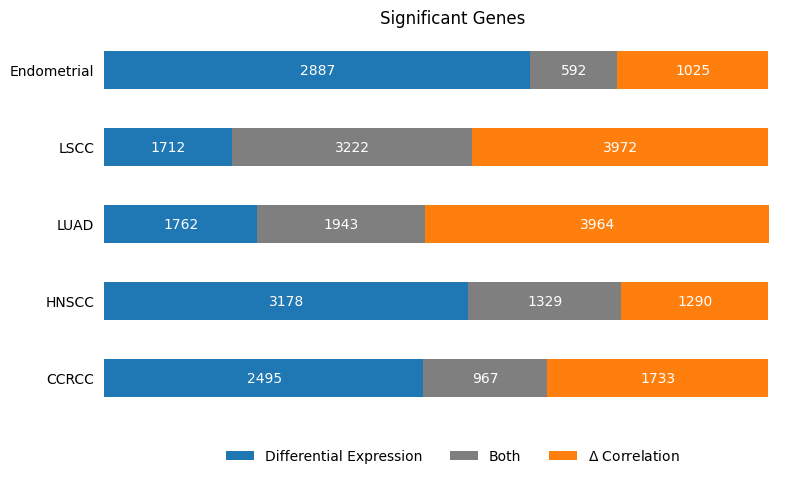

In [5]:
delta_corr_col = []
diff_ex_col = []
diff_ex_delta_corr_col = []
for cancer in cancers:
    sig_prot = set(proteomic_diff_expression[proteomic_diff_expression.Cancer == cancer].Gene)
    sig_corr = set(delta_corr_pvals[delta_corr_pvals.Cancer == cancer].Gene)
    diff_ex_col.append(len(sig_prot - sig_corr))
    diff_ex_delta_corr_col.append(len(sig_prot & sig_corr))
    delta_corr_col.append(len(sig_corr - sig_prot))

data_dict = {
    "Differential Expression" : diff_ex_col ,
    "Both" : diff_ex_delta_corr_col,
    r'$\Delta$' + " Correlation" : delta_corr_col
}
df = pd.DataFrame(data_dict, index=cancers)

totals = df.sum(axis=1)

percent = df.div(totals, axis=0).mul(100).round(2)

ax = percent.plot(kind='barh', stacked=True, figsize=(9, 5), color=['C0', "C7", 'C1'], xticks=[])

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3, frameon=False)
ax.tick_params(left=False, bottom=False)

ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)


for c, col in zip(ax.containers, df.columns):
    labels = df[col]    
    ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')
ax.set_title("Significant Genes")

plt.savefig('Figures/Figure_3_Differential_Protein_Expression_vs_Correlation_Change.png', bbox_inches='tight', dpi = 600)
